In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
# Primary Component Analysis

In [11]:
components_count = [1,2,3,4,5,6,7]

In [3]:
heart_data = pd.read_csv('heart.csv', sep=',')
auto_data = pd.read_csv('auto-mpg.csv', sep=',')

In [4]:
heart_features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
auto_features = ['cylinders','displacement','horsepower','weight','acceleration','model_year','origin']

In [107]:
x_heart = heart_data[heart_features]  
y_heart = heart_data.target 

x_auto = auto_data[auto_features] 
y_auto = auto_data.mpg

In [108]:
x_heart_scaled = StandardScaler().fit_transform(x_heart)
x_heart_scaled = pd.DataFrame(x_heart_scaled)

In [109]:
x_auto_scaled = StandardScaler().fit_transform(x_auto)
x_auto_scaled = pd.DataFrame(x_auto_scaled)

In [114]:
auto_scores = []
heart_scores = []
for count in components_count:
    pca = PCA(n_components=count)

    x_pca_auto = pca.fit_transform(x_auto_scaled)
    x_pca_auto = pd.DataFrame(x_pca_auto)

    explained_variance_auto = pca.explained_variance_ratio_.sum()
    auto_scores.append(explained_variance_auto)
    # x_pca_wine.to_csv("pca_wine.csv")

    x_pca_heart = pca.fit_transform(x_heart_scaled)
    x_pca_heart = pd.DataFrame(x_pca_heart)

    explained_variance_heart = pca.explained_variance_ratio_.sum()
    heart_scores.append(explained_variance_heart)
    if count == 5:
        x_pca_auto = pd.concat([x_pca_auto, y_auto], axis=1)
        x_pca_auto.to_csv("pca_mpg.csv")
    if count == 7:
        x_pca_heart = pd.concat([x_pca_heart, y_heart], axis=1)

        x_pca_heart.to_csv("pca_hd.csv")

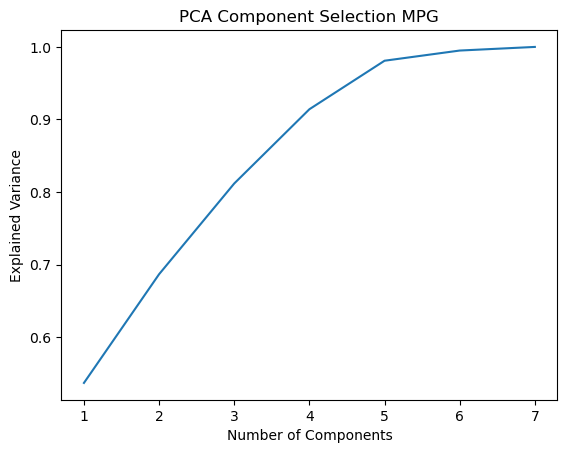

In [46]:
plt.plot(components_count, auto_scores)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA Component Selection MPG')
plt.show()

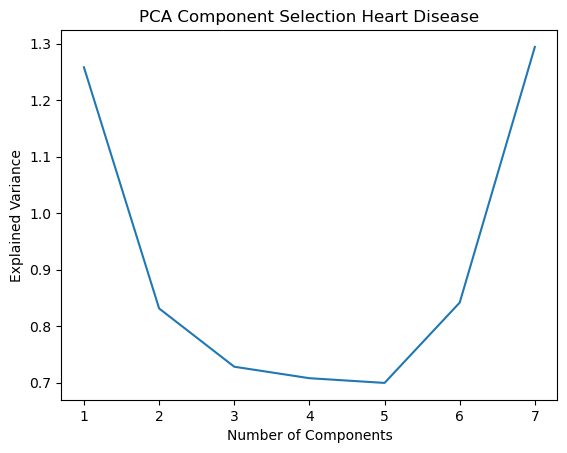

In [55]:
plt.plot(components_count, heart_scores)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA Component Selection Heart Disease')
plt.show()

In [14]:
# Indepenct Component Analysis

In [124]:
ica = FastICA()

In [125]:
auto_scores = []
heart_scores = []
for count in components_count:
    ica = FastICA(n_components=count)

    x_ica_auto = ica.fit_transform(x_auto_scaled)
    x_ica_auto = pd.DataFrame(x_ica_auto)
    explained_variance_auto = ica.explained_variance_ratio_.sum()
    auto_scores.append(explained_variance_auto)

    x_ica_heart = ica.fit_transform(x_heart_scaled)
    x_ica_heart = pd.DataFrame(x_ica_heart)
    explained_variance_heart = ica.explained_variance_ratio_.sum()

    heart_scores.append(explained_variance_heart)
    
#     if count == 3:
#         x_ica_auto = pd.concat([x_ica_auto, y_auto], axis=1)
#         x_ica_auto.to_csv("ica_mpg.csv")
#     if count == 5:
#         x_ica_heart = pd.DataFrame(x_ica_heart)
#         x_ica_heart = pd.concat([x_ica_heart, y_heart], axis=1)
#         x_ica_heart.to_csv("ica_hd.csv")

/home/lucmac/.conda/envs/asn3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


AttributeError: 'FastICA' object has no attribute 'explained_variance_ratio_'

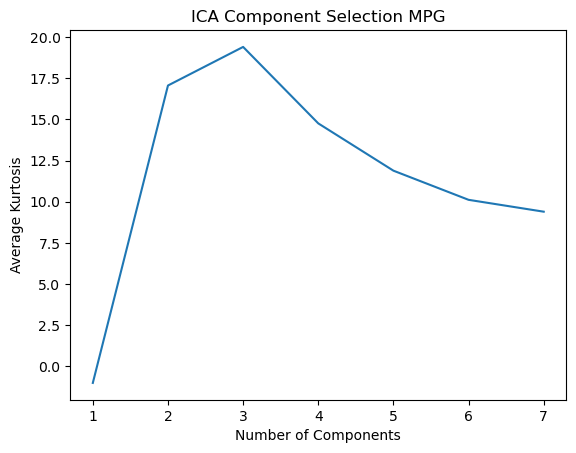

In [40]:
plt.plot(components_count, auto_scores)
plt.xlabel('Number of Components')
plt.ylabel('Average Kurtosis')
plt.title('ICA Component Selection MPG')
plt.show()


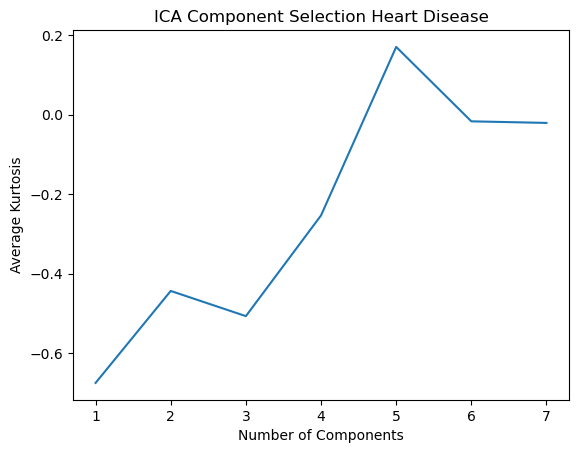

In [41]:
plt.plot(components_count, heart_scores)
plt.xlabel('Number of Components')
plt.ylabel('Average Kurtosis')
plt.title('ICA Component Selection Heart Disease')
plt.show()


In [21]:
# Random Projection Analysis

In [22]:
rp = GaussianRandomProjection()

In [116]:
auto_scores = []
heart_scores = []

for count in components:
    rp = GaussianRandomProjection(n_components=count)

    x_rp_auto = rp.fit_transform(x_auto_scaled)
    x_rp_auto = pd.DataFrame(x_rp_auto)

    auto_scores.append(np.sum(np.var(x_rp_auto, axis=0)) / np.sum(np.var(x_auto, axis=0)))
    
    rp = GaussianRandomProjection(n_components=count)

    x_rp_heart = rp.fit_transform(x_heart_scaled)
    x_rp_heart = pd.DataFrame(x_rp_heart)
    heart_scores.append(np.sum(np.var(x_rp_heart, axis=0)) / np.sum(np.var(x_heart, axis=0)))
    
    if count == 5:
        x_rp_heart = pd.concat([x_pca_heart, y_heart], axis=1)
        x_rp_auto = pd.concat([x_pca_auto, y_auto], axis=1)
        x_rp_heart.to_csv("rp_hd.csv")
        x_rp_auto.to_csv("rp_mpg.csv")



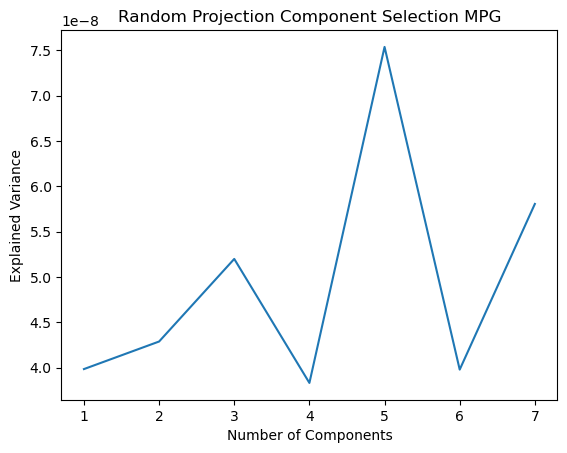

In [84]:
plt.plot(components, auto_scores)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Random Projection Component Selection MPG')
plt.show()

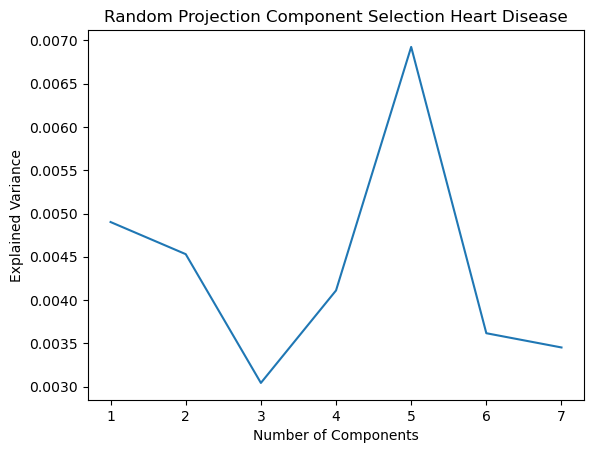

In [83]:
plt.plot(components, heart_scores)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Random Projection Component Selection Heart Disease')
plt.show()

In [ ]:
# TSNE

In [118]:
components = [1,2,3,4,5,6,7]
auto_scores = []
heart_scores = []
for count in components:
    tsne = TSNE(n_components=count, method='exact', random_state=8)
    x_tsne_auto = tsne.fit_transform(x_auto_scaled)
    x_tsne_auto = pd.DataFrame(x_tsne_auto)
    score = tsne.kl_divergence_
    auto_scores.append(score)
    
    x_tsne_heart = tsne.fit_transform(x_heart_scaled)
    x_tsne_heart = pd.DataFrame(x_tsne_heart)
    score = tsne.kl_divergence_
    heart_scores.append(score)
    
    if count == 7:
        x_tsne_auto = pd.concat([x_tsne_auto, y_auto], axis=1)
        x_tsne_auto.to_csv("tsne_mpg.csv")
    if count == 5:
        x_tsne_heart = pd.concat([x_tsne_heart, y_heart], axis=1)
        x_tsne_heart.to_csv("tsne_hd.csv")


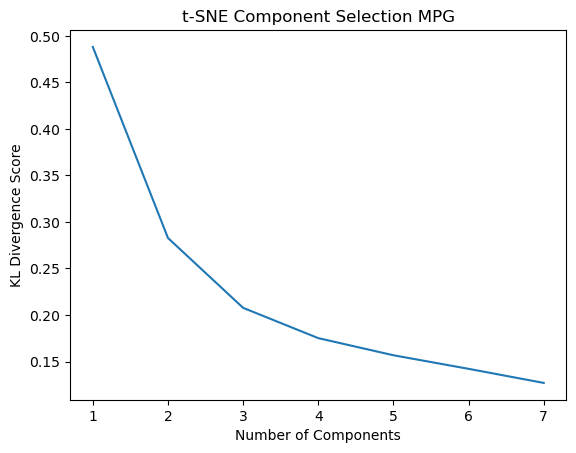

In [53]:
plt.plot(components, auto_scores)
plt.xlabel('Number of Components')
plt.ylabel('KL Divergence Score')
plt.title('t-SNE Component Selection MPG')
plt.show()

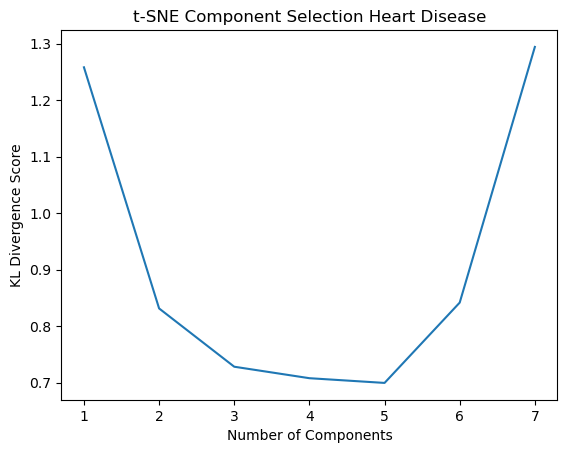

In [54]:
plt.plot(components, heart_scores)
plt.xlabel('Number of Components')
plt.ylabel('KL Divergence Score')
plt.title('t-SNE Component Selection Heart Disease')
plt.show()